<a href="https://colab.research.google.com/github/anamunoz01/AA_PRACTICA2_GRUPO_10/blob/main/Practica2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRÁCTICA 2**

GRUPO 10

Elena Gómez

Ana Muñoz

## **OBJETIVO**

Crea un modelo de Red de Neuronas **Convolucionales** que sea capaz de reconocer y clasificar imágenes de ropa en sus diferentes tipologías. Este modelo será definido, configurado, entrenado, evaluado y mejorado para posteriormente usarlo para hacer predicciones. 

Crearemos un modelo en Keras aplicando todos los pasos al conjunto de datos Fashion-MNIST.

Fashion-MNIST es un conjunto de datos de las imágenes de los artículos de Zalando, una tienda de moda online alemana especializada en ventas de ropa y zapatos. 

El conjunto de datos contiene 70K imágenes en escala de grises en 10 
categorías. Estas imágenes muestran prendas individuales de ropa en baja resolución (28 x 28 píxeles). Se usan 60K imágenes para entrenar la red y 10K imágenes para evaluar la precisión con la que la red aprende a clasificar las imágenes

- Importamos tensorflow y comprobamos que la versión es 2.0.0 o superior 



In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)#

2.7.0


- Importamos todos los '' necesarios para nuestro problema

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from keras.utils.np_utils import to_categorical

- A continuación, cargamos las imágenes y creamos un vector de 10 elementos en el que a cada posición se le asigna el nombre de cada prenda. ('class_names')


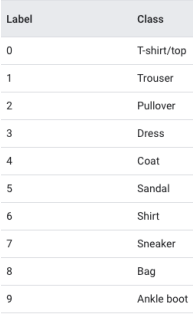

In [ ]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Creamos vector con las prendas
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Estudiamos los datos?

## **Creamos los modelos**

**MODELO 1**

In [ ]:
model1 = Sequential()
model1.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model1.add(MaxPooling2D((2, 2)))
model1.summary()


In [ ]:
model1.add(Conv2D(64, (5, 5), activation='relu'))
model1.add(MaxPooling2D((2, 2)))
model1.summary()


In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

model1.add(Flatten())
model1.add(Dense(10, activation='softmax'))
model1.summary()

**Compilamos los modelos**


* Para el algoritmo optimizador utilizamos '**adam**' , o '**sgd**' (Stocastic Gradient Descendent), dependiendo del modelo.

* Para la función de perdida elegimos **sparse_categorical_crossentropy** que se utiliza como señal de retroalimentación para aprender los tensores de peso y que la fase de entrenamiento intentará minimizar.

* Para la precisión utilizaremos **accuracy**: Solo tendremos en cuenta la fracción de imágenes que son correctamente clasificadas.

In [ ]:
model1.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy']

## **Tansformación de datos**

Antes del entrenamiento, preprocesaremos nuestros datos dándoles la forma que espera la red y escalando para que todos los valores estén en el intervalo [0, 1]. Pasando de una matriz de forma (60000, 28, 28) con valores en el intervalo [0, 255] a una matriz de forma float32 con forma (60000, 28, 28, 1) con valores entre 0 y 1

In [ ]:
print (train_images.shape)
print (train_labels.shape)

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

print (train_images.shape)
print (train_labels.shape)

## **Entrenamos y probamos los modelos**

Utilizamos la función `fit` que devuelve los valores de pérdida y de precisión de la red para las imágenes de entrenamiento.

In [ ]:
model1.fit(train_images, train_labels, epochs=5, batch_size=100)


Evaluación con los datos de prueba

In [ ]:
test_loss1, test_acc1 = model1.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc1)

## **Apartado 3**

Analizar e interpretar los resultados del caso 1 frente a su original si se 
multiplica por 5 las épocas de entrenamiento (25)


In [ ]:
model11 = Sequential()
model11.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model11.add(MaxPooling2D((2, 2)))

model11.add(Conv2D(64, (5, 5), activation='relu'))
model11.add(MaxPooling2D((2, 2)))

model11.add(Flatten())
model11.add(Dense(10, activation='softmax'))
model11.summary()


In [ ]:
model11.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model11.fit(train_images, train_labels, epochs=25, batch_size=100)

test_loss11, test_acc11 = model11.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc11)

## **Apartado 4**

Analizar el resultado del caso 1 si en lugar de ReLU usas tanh en la función de 
activación de las dos capas convolucionales.


In [ ]:
model12 = Sequential()
model12.add(Conv2D(32, (5, 5), activation='tanh', input_shape=(28, 28, 1)))
model12.add(MaxPooling2D((2, 2)))

model12.add(Conv2D(64, (5, 5), activation='tanh'))
model12.add(MaxPooling2D((2, 2)))

model12.add(Flatten())
model12.add(Dense(10, activation='softmax'))
model12.summary()

In [ ]:
model12.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model12.fit(train_images, train_labels, epochs=5, batch_size=100)

test_loss12, test_acc12 = model12.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc12)

## **Predicciones**

In [ ]:
# Veamos el elemento 6 de test y pintémoslo con matplotlib
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
import matplotlib.pyplot as plt
digit = test_images[5]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [ ]:
#????
train_images = train_images.reshape((60000, 28,28,1))
test_images = test_images.reshape((10000, 28,28,1))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255


Hacemos predicciones sobre la 6º imagen de test en cada modelo

 **Modelo 1**

In [ ]:
import numpy as np
predictions1 = model1.predict(test_images)
print(np.argmax(predictions1[5]))
print(predictions1[5])
np.sum(predictions1[5])
print(predictions1)

Ahora vamos a graficar las predicciones de la imagen 6 en cada modelo

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

**Modelo 1**

In [ ]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions1[i], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(i, predictions1[i],  test_labels)
plt.show()

Vemos la predicción, igual que el gráfico anterior, de las 14 primeras imágenes del conjunto de test, para cada uno de los casos.

In [ ]:
for i in range(14):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions1[i], test_labels, test_images.reshape(10000,28,28))
    plt.subplot(1,2,2)
    plot_value_array(i, predictions1[i],  test_labels)
    plt.show()
    plt.clf()